<a href="https://colab.research.google.com/github/thgemanuel/Etapa-1_Topicos_especiais_em_IC/blob/main/Trabalho_final_Etapa_1_TIC_Thiago_Emanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição atividade

Definição do projeto da disciplina

Aplicar os conceitos de inteligência computacional a uma base de dados do mundo real, com o uso de ferramentas de estatística descritiva, de gráficos para visualização de dados, de seleção de características, de limpeza de dados e de algoritmos de regressão e/ou de classificação.

Projeto – parte 1:

1. Seleção e apresentação da base de dados (10 colunas e 1000 amostras, no mínimo)

2. Limpeza e tratamento dos dados

3.  Escolha da abordagem (regressão ou classificação)

4. Análise Exploratória dos Dados
(aplicar  as estatísticas pertinentes)
Média, mínimo, máximo e desvio padrão das variáveis/colunas/características
Gráficos (dispersão, circular, histograma, boxplot)

5. Correlação

# **Seleção e apresentação da base de dados**

1 - Base de dados *Predict Test Scores of students* 

> Este conjunto de dados consiste nas informações sobre um teste escrito por alguns alunos. Inclui características como: Ambiente escolar, tipo escolar, sexo, notas de pré-vestibulares, entre outros.

> ‎Tem o objetivo de obter diversas abordagens na previsão das pontuações pós-teste dos alunos.

> Possui 11 colunas.

> Realizar o procesos de regressão, com o objetivo de prever uma nota pós teste de um aluno.

*   [Kaggle - Predict Test Scores of students](https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students)





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files

from sklearn.model_selection import train_test_split


In [2]:
uploaded = files.upload()
ts = pd.read_csv(io.BytesIO(uploaded['test_scores.csv']))

Saving test_scores.csv to test_scores.csv


# Modelagem dos dados

In [3]:
df2 = ts.drop(['classroom','student_id'], axis = 1)
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [4]:
df2['school_type'] = df2['school_type'].str.replace('-', '_')
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non_public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non_public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non_public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non_public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non_public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [5]:
df2.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


# Verificar se existe algum atributo com tupla vazia

In [6]:
df2.isnull().sum()

school             0
school_setting     0
school_type        0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

# Análise Exploratória dos Dados

In [12]:
df2['n_student'].describe() 

count    2133.000000
mean       22.796531
std         4.228893
min        14.000000
25%        20.000000
50%        22.000000
75%        27.000000
max        31.000000
Name: n_student, dtype: float64

In [13]:
df2['pretest'].describe()

count    2133.000000
mean       54.955931
std        13.563101
min        22.000000
25%        44.000000
50%        56.000000
75%        65.000000
max        93.000000
Name: pretest, dtype: float64

In [14]:
df2['posttest'].describe()

count    2133.000000
mean       67.102203
std        13.986789
min        32.000000
25%        56.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: posttest, dtype: float64

# Correlação

Esta função corr(), retorna um dataframe de correlação de pares entre as colunas. A partir da tabela, percebe-se uma correlação fraca entre as pontuações de "n_students" e o "pretest" / "posttest". Na diagonal os valores são iguais a 1, pois cada coluna está perfeitamente correlacionada consigo mesma.


In [7]:
print(df2.corr())

           n_student   pretest  posttest
n_student   1.000000 -0.499253 -0.504886
pretest    -0.499253  1.000000  0.950884
posttest   -0.504886  0.950884  1.000000


# Porcentagem para cada valor dos atributos

In [8]:
for x in ["school_setting", "school_type", "teaching_method", "gender", "lunch"]:
    for val in df2[x].unique():
        qtd = df2[x].value_counts()[val]
        porcento = df2[x].value_counts(normalize=True)[val] * 100
        print(f"{val} -> Ocorrencias: {qtd}, Porcentagem: {porcento:.2f}%")
    print("-------------------------------------------")

Urban -> Ocorrencias: 906, Porcentagem: 42.48%
Suburban -> Ocorrencias: 717, Porcentagem: 33.61%
Rural -> Ocorrencias: 510, Porcentagem: 23.91%
-------------------------------------------
Non_public -> Ocorrencias: 551, Porcentagem: 25.83%
Public -> Ocorrencias: 1582, Porcentagem: 74.17%
-------------------------------------------
Standard -> Ocorrencias: 1373, Porcentagem: 64.37%
Experimental -> Ocorrencias: 760, Porcentagem: 35.63%
-------------------------------------------
Female -> Ocorrencias: 1056, Porcentagem: 49.51%
Male -> Ocorrencias: 1077, Porcentagem: 50.49%
-------------------------------------------
Does not qualify -> Ocorrencias: 1215, Porcentagem: 56.96%
Qualifies for reduced/free lunch -> Ocorrencias: 918, Porcentagem: 43.04%
-------------------------------------------


Quando uma distribuição tem menor variabilidade, os valores em um conjunto de dados são mais consistentes. No entanto, quando a variabilidade é maior, os pontos de dados são mais diferentes e os valores extremos se tornam mais prováveis. Dessa forma, compreender a variabilidade ajuda a compreender a probabilidade de eventos incomuns.

Nesse gráfico do atributo 'n_student', possui uma inclinação para a direita, pois tem sua média maior do que sua mediana.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


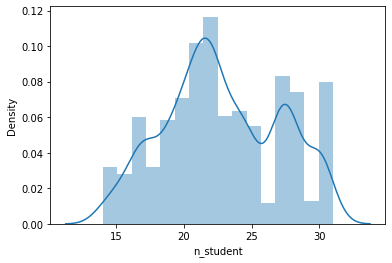

In [9]:
sns.distplot(df2["n_student"])

O gráfico abaixo é uma distribuição uniforme de valores no recurso de "pretest". Dessa forma, os valores médios e medianos são próximos um do outro.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


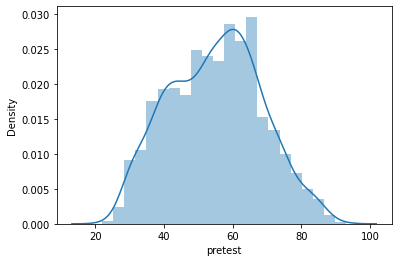

In [10]:
sns.distplot(df2["pretest"])

O gráfico abaixo é uma distribuição uniforme de valores no recurso "postest". Dessa forma, os valores médios e medianos são próximos um do outro.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


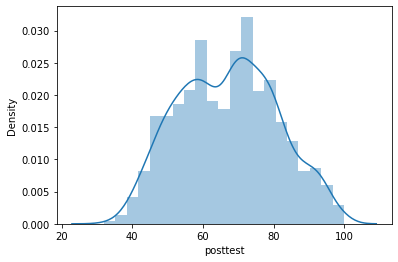

In [11]:
sns.distplot(df2["posttest"])

O grafico abaixo, mostra uma distribuição normal, portanto, os dados são bons para gerar um bom modelo de aprendizado de máquina.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


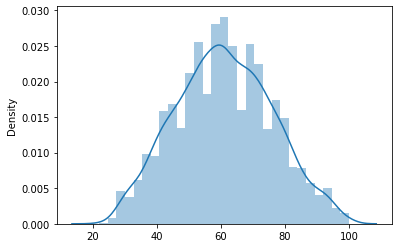

In [15]:
sns.distplot(df2[["pretest","posttest"]])